# Importing Libraries

In [202]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn import metrics
import warnings

# Loading and pre processing data

In [203]:
#reading the csv file
df=pd.read_csv("healthcare-dataset-stroke-data.csv")
#printing top 5 rows of df
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [204]:
#removing duplicates
df.drop_duplicates(inplace = True)

# EDA

In [205]:
#Count of the different types of gender
count_gender=df['gender'].value_counts()
count_gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

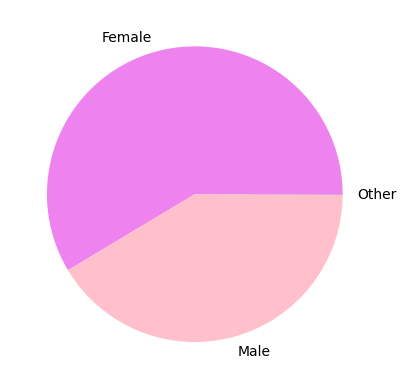

In [206]:
#Visualizing the different genders using a piee chart
plt.pie(count_gender,labels=["Female","Male","Other"],colors=["violet","pink","blue"])
plt.show()

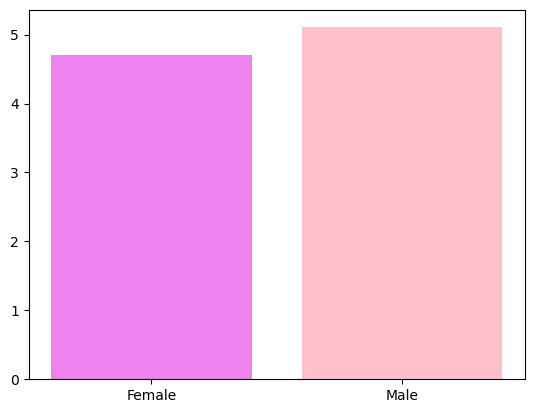

In [207]:
#Comparison of no.of male and female who had a heart stroke
stroke_gender=((df[df['stroke'] == 1]['gender'].value_counts())/count_gender)*100
plt.bar(["Female","Male","Other"],stroke_gender,color=["violet","pink","blue"])
plt.show()

In [208]:
#Different types of residence 
count_residence=df['Residence_type'].value_counts()
count_residence

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

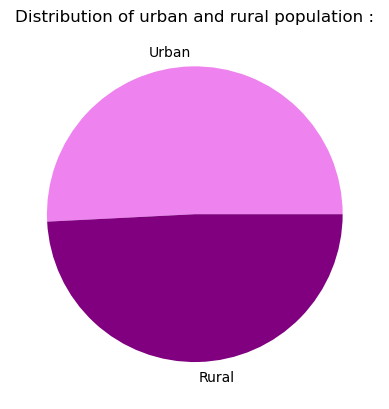

In [209]:
#Visualization of the different types of residence
plt.pie(count_residence,labels =["Urban","Rural"],colors=["violet","purple"])
plt.title("Distribution of urban and rural population :")
plt.show()

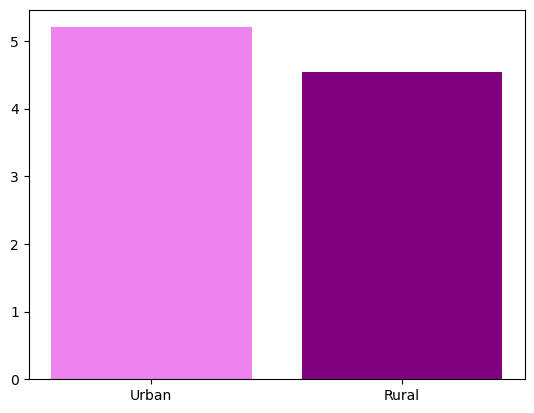

In [210]:
#Visualization of the no.of people who had stroke based on their residence
stroke_resitype=((df[df['stroke'] == 1]['Residence_type'].value_counts())/count_residence)*100
plt.bar(["Urban","Rural"],stroke_resitype,color=["violet","purple"])
plt.show()

In [246]:
#Different worktypes
count_wtype=df['work_type'].value_counts()
count_wtype

Private          2811
Self-employed     775
children          671
Govt_job          630
Never_worked       22
Name: work_type, dtype: int64

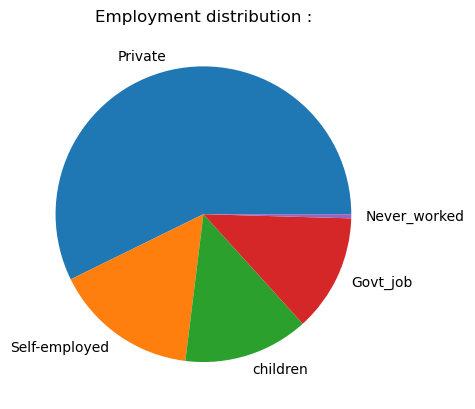

In [247]:
#Visualization of different worktypes using a piechart
work=["Private","Self-employed","children","Govt_job","Never_worked"]
plt.pie(count_wtype,labels =work)
plt.title("Employment distribution :")
plt.show()

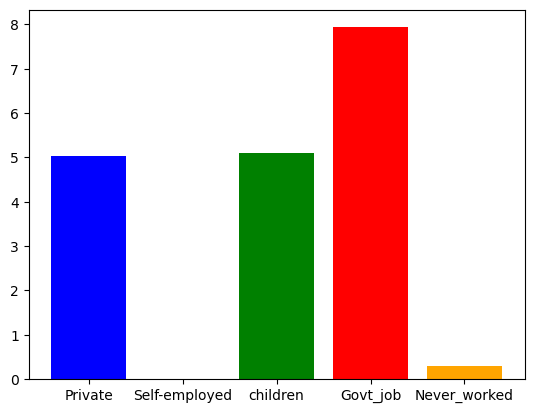

In [213]:
#Visualization of those who had stroke based on their worktype
stroke_wtype=((df[df['stroke'] == 1]['work_type'].value_counts())/count_wtype)*100
plt.bar(work,stroke_wtype,color=["blue","green","green","red","orange"])
plt.show()

In [248]:
#Different smoke status
count_smoke=df['smoking_status'].value_counts()
count_smoke

never smoked       1852
Unknown            1483
formerly smoked     837
smokes              737
Name: smoking_status, dtype: int64

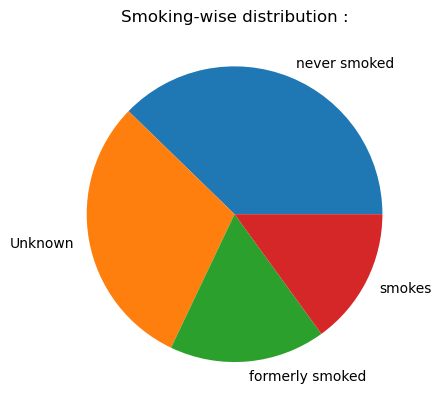

In [249]:
#Visualizaation of diferent smoke status
smoke=["never smoked","Unknown","formerly smoked","smokes"]
plt.pie(count_smoke,labels =smoke)
plt.title("Smoking-wise distribution :")
plt.show()

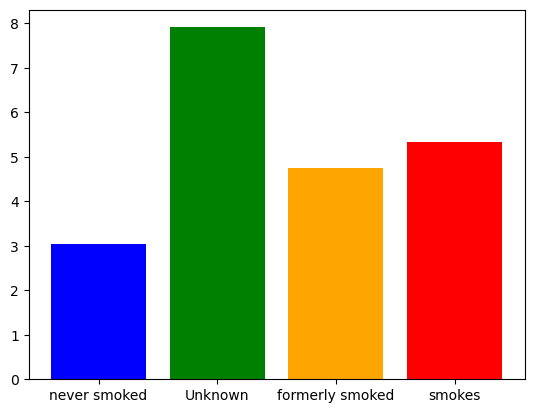

In [216]:
#Visualization of the no.of people who had stroke based on their smoke status
stroke_smoke=((df[df['stroke'] == 1]['smoking_status'].value_counts())/count_smoke)*100
plt.bar(smoke,stroke_smoke,color=["blue","green","orange","red"])
plt.show()

# Data Preprocessing

In [217]:
#Finding the no.of rows and no.of columns in the data 
df.shape

(5110, 12)

In [218]:
#finding the total number of null values
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [219]:
#dropping null values
df=df.dropna()
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [220]:
#converting object type data to categorical data
X['gender'] = X['gender'].astype('category')
X['ever_married']=X['ever_married'].astype('category')
X['work_type']=X['work_type'].astype('category')
X['Residence_type']=X['Residence_type'].astype('category')
X['smoking_status']=X['smoking_status'].astype('category')

In [221]:
#adding the different categorical features from df to the dictonary categories
categories={}
categories['gender']=list(X['gender'].cat.categories)
categories['ever_married']=list(X['ever_married'].cat.categories)
categories['work_type']=list(X['work_type'].cat.categories)
categories['Residence_type']=list(X['Residence_type'].cat.categories)
categories['smoking_status']=list(X['smoking_status'].cat.categories)

In [222]:
X['gender'] = X['gender'].cat.codes
X['ever_married']=X['ever_married'].cat.codes
X['work_type']=X['work_type'].cat.codes
X['Residence_type']=X['Residence_type'].cat.codes
X['smoking_status']=X['smoking_status'].cat.codes

In [194]:
#specifying dependant and independant variables
X=df.drop(['id','stroke'],axis=1)
y=df["stroke"]

In [132]:
#checking whether the data is balanced
y_count=y.value_counts()
print(y_count)

0    4700
1     209
Name: stroke, dtype: int64


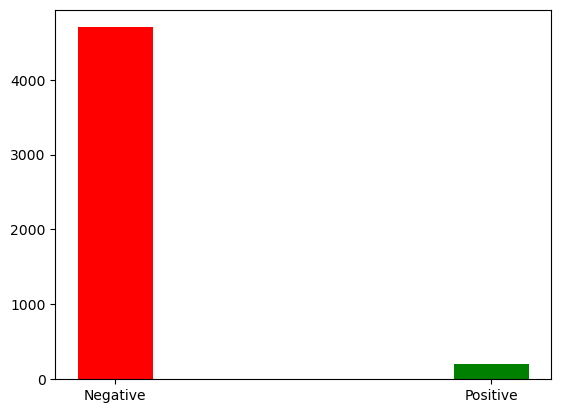

In [133]:
#Visualization of the no.of negative and positive instances
stroke=["Negative","Positive"]
no_of_data=[y_count[0],y_count[1]]
plt.bar(stroke,no_of_data,width=0.2,color=["red","green"],align="center")
plt.show()

In [137]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,2,1,228.69,36.6,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2
3,0,49.0,0,0,1,2,1,171.23,34.4,3
4,0,79.0,1,0,1,3,0,174.12,24.0,2
5,1,81.0,0,0,1,2,1,186.21,29.0,1


In [138]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.30, random_state=0)

In [139]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns)
X_test=pd.DataFrame(sc.transform(X_test), columns=X_test.columns)

In [140]:
sm = SMOTE(random_state=2)
train_x, train_y = sm.fit_resample(X_train, y_train.ravel())
print("After Oversampling using SMOTE,\n\nNumber of positive instances =",sum(train_y==1))
print("Number of negative instances =",sum(train_y==0))

After Oversampling using SMOTE,

Number of positive instances = 3282
Number of negative instances = 3282


# INITIALIZING VARIOUS BINARY CLASSIFIERS
# Random Forest Classifier :

In [154]:
from sklearn.ensemble import RandomForestClassifier
models = {}
models['Random Forest'] = RandomForestClassifier()

# K-Nearest Neighbor

In [155]:
from sklearn.neighbors import KNeighborsClassifier
models['K-Nearest Neighbor'] = KNeighborsClassifier()

# Decision Tree Classifier

In [156]:
from sklearn.tree import DecisionTreeClassifier
models['Decision Trees'] = DecisionTreeClassifier()

# Perfomance Evsluation

In [231]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
accuracy, precision, recall = {}, {}, {}
predictions={}
for key in models.keys():
    models[key].fit(train_x, train_y)
    predictions[key] = models[key].predict(X_test)
    accuracy[key] = accuracy_score(predictions[key], y_test)
    precision[key] = precision_score(predictions[key], y_test)
    recall[key] = recall_score(predictions[key], y_test)

In [232]:
evaluation = pd.DataFrame(index=models.keys())
evaluation['Accuracy'] = accuracy.values()
evaluation['Precision'] = precision.values()
evaluation['Recall'] = recall.values()
evaluation

,Accuracy,Precision,Recall
Random Forest,0.932790,0.109091,0.107143
K-Nearest Neighbor,0.807196,0.436364,0.086643
Decision Trees,0.894773,0.272727,0.115385
Support Vector Machines,0.756280,0.545455,0.082418


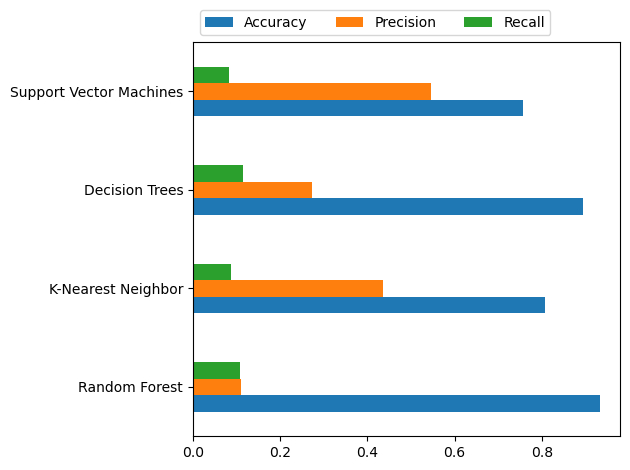

In [233]:
ax = evaluation.plot.barh()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 10}
)
plt.tight_layout()

# Model Tuning 

In [239]:
from sklearn.model_selection import GridSearchCV
grid_models = [ 
               (KNeighborsClassifier(),[{'n_neighbors':[5,7,8,10], 'metric': ['euclidean', 'manhattan', 'chebyshev', 'minkowski']}]), 
               (DecisionTreeClassifier(),[{'criterion':['gini','entropy'],'random_state':[0]}]), 
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0]}])]
#gini-ptob of being misclassified
#entropy-measure of impurity in node

In [240]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy')
    grid.fit(train_x, train_y)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('')

KNeighborsClassifier():
Best Accuracy : 91.99%
Best Parameters :  {'metric': 'manhattan', 'n_neighbors': 5}


DecisionTreeClassifier():
Best Accuracy : 92.82%
Best Parameters :  {'criterion': 'entropy', 'random_state': 0}


RandomForestClassifier():
Best Accuracy : 96.63%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 0}




# HYPERPARAMETER TUNING :
# Fitting the best model :

In [243]:
model = RandomForestClassifier(criterion='entropy',n_estimators=150,random_state=0)
model.fit(train_x, train_y)
predicted=model.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1418
           1       0.12      0.13      0.12        55

    accuracy                           0.93      1473
   macro avg       0.54      0.55      0.54      1473
weighted avg       0.93      0.93      0.93      1473



In [244]:
print("Accuracy of random forest classifier after hyperparameter tuning = ",round(accuracy_score(predicted, y_test)*100,0),"%")

Accuracy of random forest classifier after hyperparameter tuning =  93.0 %


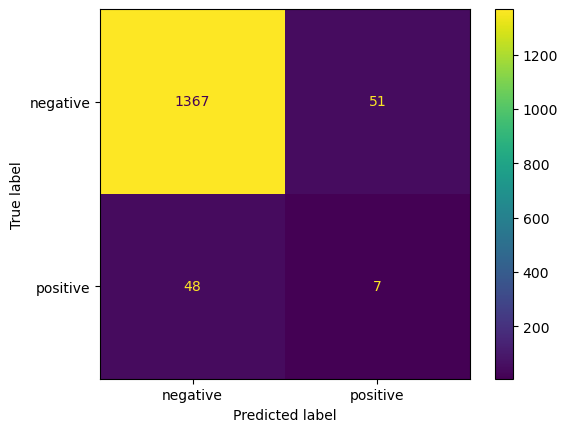

In [238]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["negative","positive"])
cm_display.plot()
plt.show()